In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet


In [2]:
chicago_df_1 = pd.read_csv('data/Chicago_Crimes_2005_to_2007.csv',on_bad_lines='skip')
chicago_df_2 = pd.read_csv('data/Chicago_Crimes_2008_to_2011.csv',on_bad_lines='skip')
chicago_df_3 = pd.read_csv('data/Chicago_Crimes_2012_to_2017.csv',on_bad_lines='skip')


In [3]:
chicago_df_1.shape

(1872343, 23)

In [4]:
chicago_df_2.shape

(2688710, 23)

In [5]:
chicago_df_3.shape

(1456714, 23)

In [6]:
chicago_df = pd.concat([chicago_df_1,chicago_df_2,chicago_df_3], ignore_index=True)

In [7]:
chicago_df.shape

(6017767, 23)

In [8]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


<Axes: >

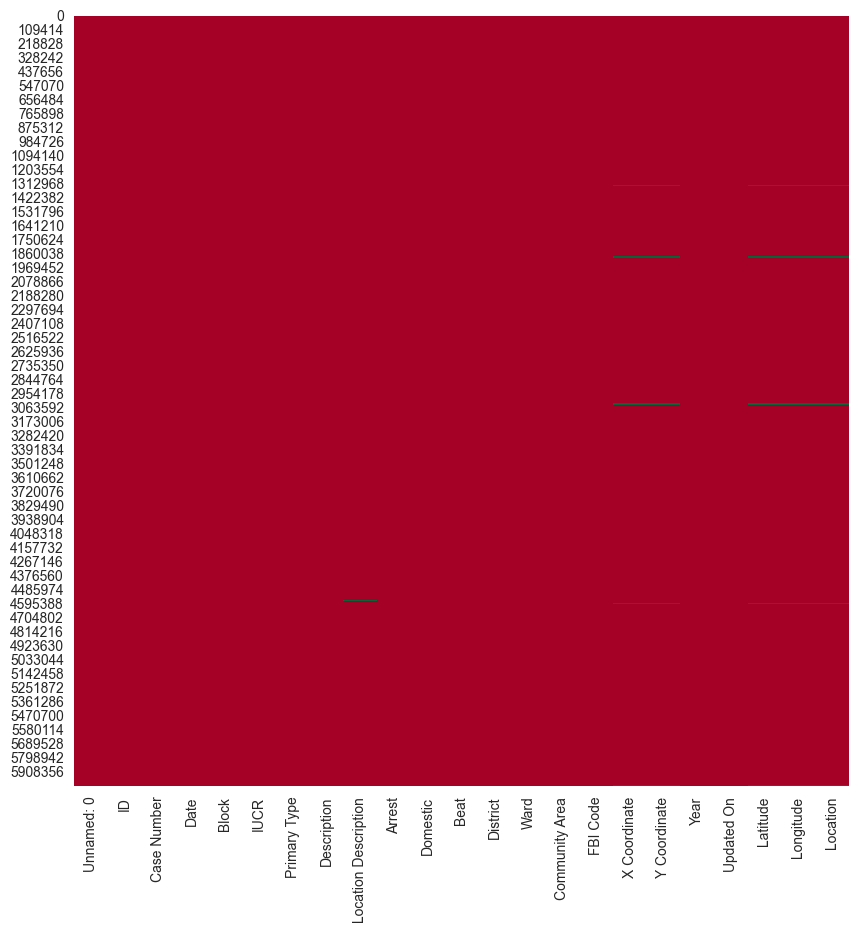

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(),cbar=False,cmap='RdYlGn')

In [12]:
chicago_df.drop(['Unnamed: 0','Case Number','ID','IUCR','X Coordinate','Y Coordinate', 'Updated On','Year','FBI Code','Beat','Ward','Community Area','Location','District','Latitude','Longitude'],axis=1,inplace=True)

In [ ]:
c

In [13]:
chicago_df.Date = pd.to_datetime(chicago_df.Date,format='%m/%d/%Y %I:%M:%S %p')

In [20]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [14]:
chicago_df['Primary Type'].value_counts()

Primary Type
THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                58

In [16]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

<Axes: xlabel='count', ylabel='Primary Type'>

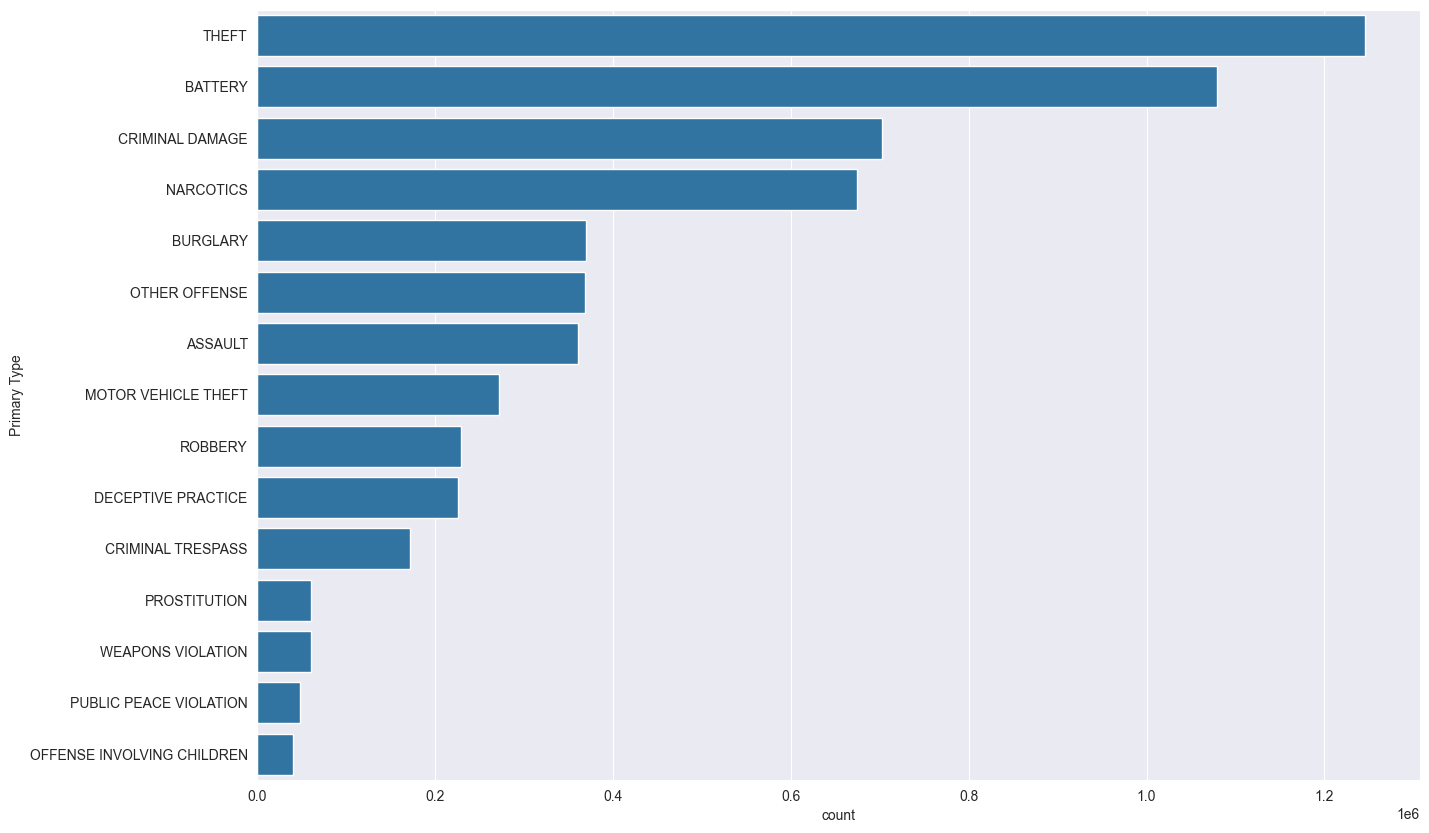

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type',data=chicago_df,order=order_data)

<Axes: xlabel='count', ylabel='Location Description'>

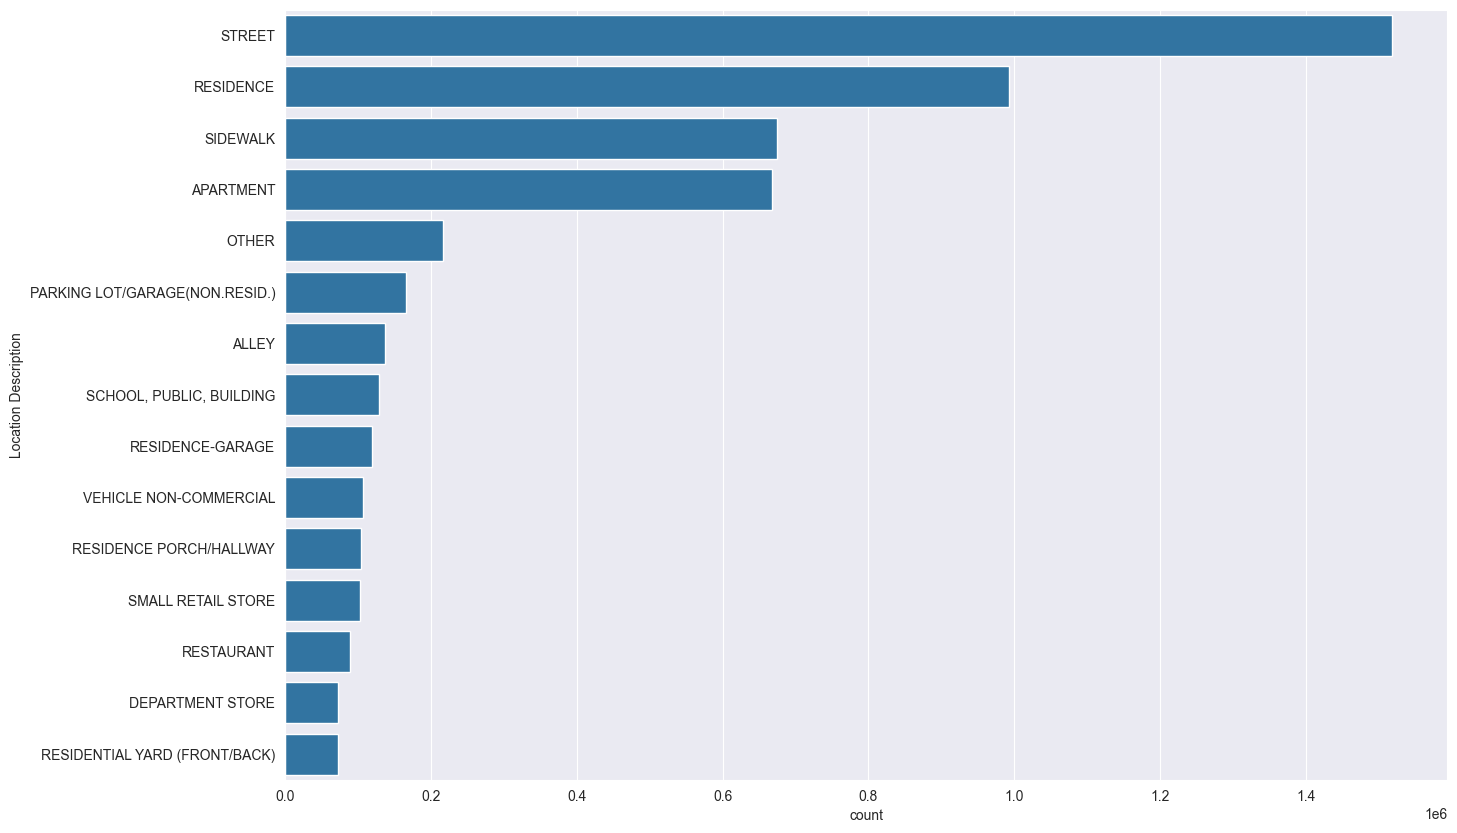

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description',data=chicago_df,order=chicago_df['Location Description'].value_counts().iloc[:15].index)

In [22]:
chicago_df.resample('YE').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: YE-DEC, dtype: int64

Text(0, 0.5, 'Number of crimes')

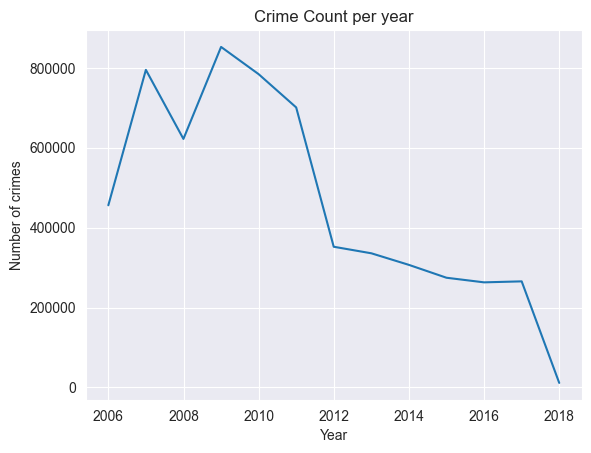

In [24]:
plt.plot(chicago_df.resample('YE').size())
plt.title('Crime Count per year')
plt.xlabel('Year')
plt.ylabel('Number of crimes')

C:\Users\ibuko\AppData\Local\Temp\ipykernel_27868\1028028135.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(chicago_df.resample('M').size())


Text(0, 0.5, 'Number of crimes')

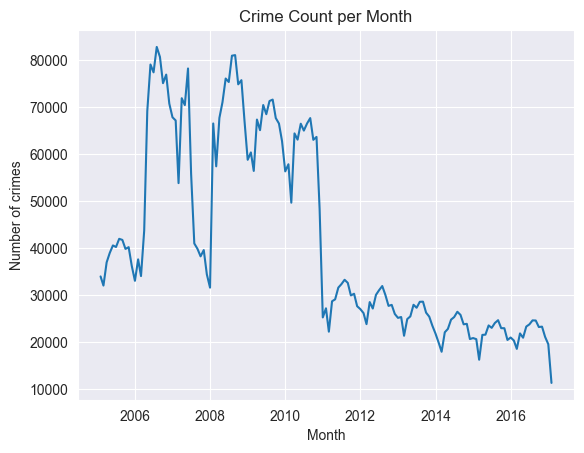

In [26]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crime Count per Month')
plt.xlabel('Month')
plt.ylabel('Number of crimes')

Text(0, 0.5, 'Number of crimes')

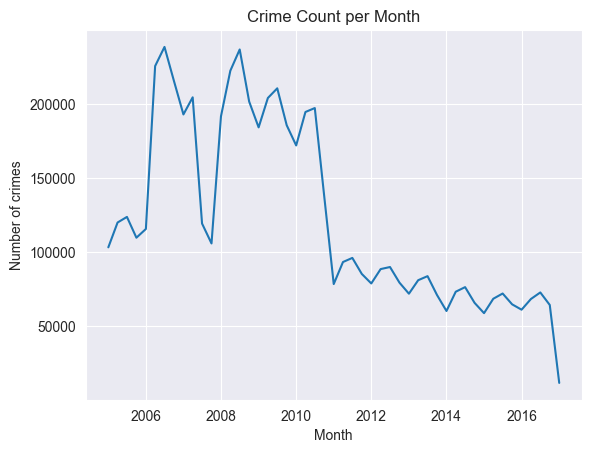

In [27]:
plt.plot(chicago_df.resample('QS').size())
plt.title('Crime Count per Quaters')
plt.xlabel('Quater')
plt.ylabel('Number of crimes')

In [28]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

C:\Users\ibuko\AppData\Local\Temp\ipykernel_27868\3892747024.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chicago_prophet = chicago_df.resample('M').size().reset_index()


In [33]:
chicago_prophet.columns

Index(['Date', 0], dtype='object')

In [34]:
chicago_prophet.columns = ['ds', 'y']

In [35]:
m = Prophet()
m.fit(chicago_prophet)

21:02:18 - cmdstanpy - INFO - Chain [1] start processing
21:02:19 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
future = m.make_future_dataframe(periods=720)
forecast = m.predict(future)

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.833000,40031.652683,72775.242719,60454.833000,60454.833000,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,0.0,0.0,0.0,55692.442795
1,2005-02-28,60322.430432,32169.552756,68028.752102,60322.430432,60322.430432,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,0.0,0.0,0.0,50821.913052
2,2005-03-31,60175.841875,41272.071509,75452.973199,60175.841875,60175.841875,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,0.0,0.0,0.0,58951.694169
3,2005-04-30,60033.981981,44877.590206,77790.157783,60033.981981,60033.981981,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,0.0,0.0,0.0,61216.808655
4,2005-05-31,59887.393424,48905.442110,82225.357550,59887.393424,59887.393424,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,0.0,0.0,0.0,65385.640515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2019-01-17,5465.740830,-16528.022452,17738.780155,5034.602471,5901.646654,-5243.347268,-5243.347268,-5243.347268,-5243.347268,-5243.347268,-5243.347268,0.0,0.0,0.0,222.393562
861,2019-01-18,5452.674209,-17321.792108,16644.619356,5020.616167,5889.464885,-5243.883636,-5243.883636,-5243.883636,-5243.883636,-5243.883636,-5243.883636,0.0,0.0,0.0,208.790573
862,2019-01-19,5439.607587,-16503.776076,16315.515242,5006.629863,5877.378669,-5241.099046,-5241.099046,-5241.099046,-5241.099046,-5241.099046,-5241.099046,0.0,0.0,0.0,198.508541
863,2019-01-20,5426.540966,-17063.524662,16304.116826,4992.643559,5866.224992,-5233.448179,-5233.448179,-5233.448179,-5233.448179,-5233.448179,-5233.448179,0.0,0.0,0.0,193.092788


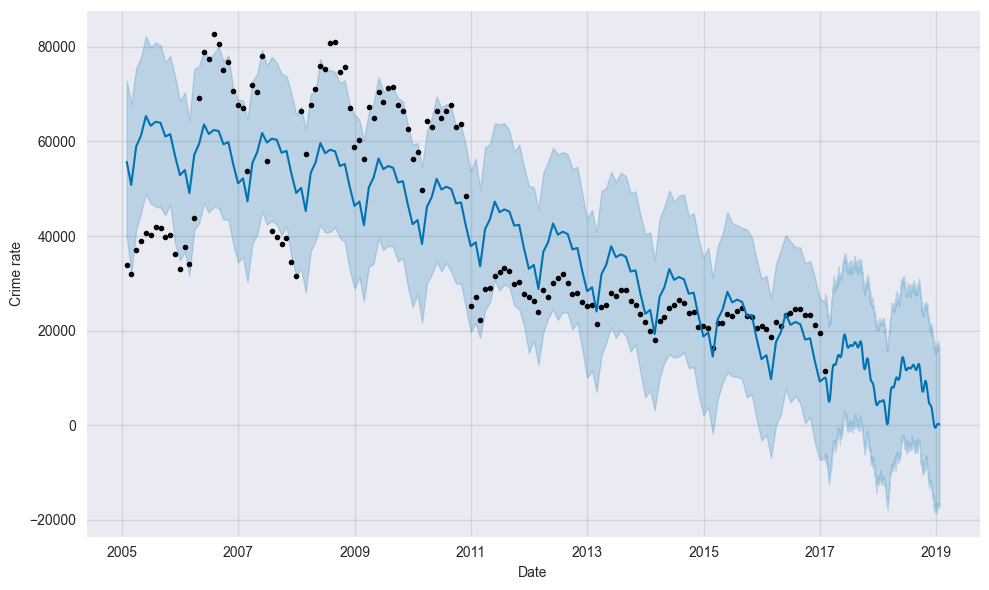

In [42]:
figure = m.plot(forecast,xlabel='Date',ylabel='Crime rate')

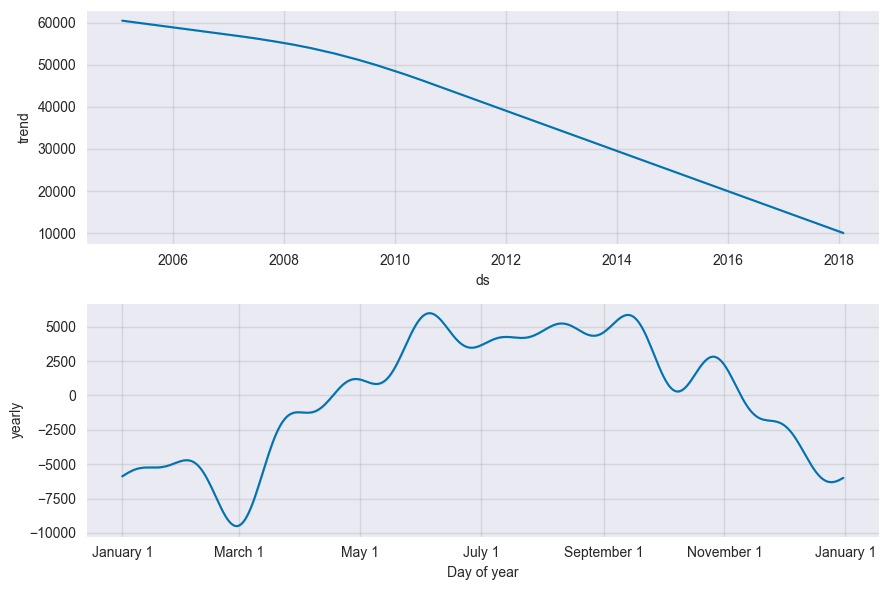

In [39]:
figure = m.plot_components(forecast)